## Basic Model Building and Training Using Keras (Class 3) 
We will build our first basic model. We will go over concepts like:
- Data Preprocessing
 - Numpy, Pandas
- Building Datasets
 - Sci-Kit Learn
- Creating Labels for Datasets
- Building a Simple Sequential Model
 - Keras, Tensorflow
- Training Models
- Making Predictions with Models
- Creating Confusion Matrices

## Data Pre-Processing
We will begin by creating our dataset and processing it.

In [2]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

Numpy is a library that creates 2d and 3d arrays that can be read my machine learning algorithms.
<img src="images/numpy.png">

We will begin by creating two empty arrays for our labels.

In [3]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.
- Our ultimate goal is to be able to determine is a certain patient is at risk of side effects from this certain medicine.

The following code is just for building our dataset, just copy it, usually you will be importing datasets and not creating them yourself. Since we are randomly creating this dataset, there ultimately is nothing to learn from this dataset because they are completely random. Using a real dataset allows us to learn real things from the dataset and to be able to create real predictions.

In [4]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
#print raw data
for i in train_samples:
    print(i)

53
99
35
76
34
89
18
96
63
67
35
91
13
65
49
100
63
67
22
67
56
82
49
90
24
66
61
93
40
80
57
99
29
95
32
96
47
70
42
92
17
76
44
68
13
73
39
72
44
81
26
71
36
93
63
97
59
95
23
86
41
99
60
90
16
96
45
70
17
76
49
85
54
100
53
88
38
100
60
79
22
91
61
89
14
86
30
76
16
74
24
78
47
97
15
85
18
94
49
95
43
98
21
65
57
72
51
65
33
69
60
77
28
92
36
87
37
68
13
95
36
94
44
74
28
96
18
65
46
95
33
70
47
78
24
93
21
82
64
93
64
90
31
92
33
85
20
67
48
97
55
85
22
97
27
77
45
82
23
69
47
97
23
74
36
92
57
79
63
93
30
94
59
67
34
69
41
65
35
82
27
76
22
94
64
78
46
89
43
76
14
79
34
67
19
68
42
99
19
77
48
97
50
99
36
75
54
77
40
70
22
95
26
80
59
74
33
90
64
93
22
76
61
77
42
77
61
69
42
99
61
72
33
88
29
86
46
80
49
75
44
77
44
80
34
66
50
75
17
88
57
67
32
76
62
98
39
85
38
90
43
78
46
92
13
65
53
82
18
97
62
72
55
71
55
94
54
92
43
71
37
92
29
84
14
98
28
65
64
98
58
81
37
99
59
66
51
72
25
66
61
78
27
85
59
89
30
76
56
99
19
70
33
80
64
76
17
81
46
85
16
86
54
90
45
71
48
78
18
92
43
87
4

In [6]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


Labels are always 0 or 1. If there is more than one class at the end, it could be 0, 1, 2, or 3, depending on how many classes there are.

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

This code is for us to see how our data looks after we reshape and scale it into a trainable format.

In [9]:
#print scaled data
for i in scaled_train_samples:
    print(i)

[0.45977011]
[0.98850575]
[0.25287356]
[0.72413793]
[0.24137931]
[0.87356322]
[0.05747126]
[0.95402299]
[0.57471264]
[0.62068966]
[0.25287356]
[0.89655172]
[0.]
[0.59770115]
[0.4137931]
[1.]
[0.57471264]
[0.62068966]
[0.10344828]
[0.62068966]
[0.49425287]
[0.79310345]
[0.4137931]
[0.88505747]
[0.12643678]
[0.6091954]
[0.55172414]
[0.91954023]
[0.31034483]
[0.77011494]
[0.50574713]
[0.98850575]
[0.18390805]
[0.94252874]
[0.2183908]
[0.95402299]
[0.3908046]
[0.65517241]
[0.33333333]
[0.90804598]
[0.04597701]
[0.72413793]
[0.35632184]
[0.63218391]
[0.]
[0.68965517]
[0.29885057]
[0.67816092]
[0.35632184]
[0.7816092]
[0.14942529]
[0.66666667]
[0.26436782]
[0.91954023]
[0.57471264]
[0.96551724]
[0.52873563]
[0.94252874]
[0.11494253]
[0.83908046]
[0.32183908]
[0.98850575]
[0.54022989]
[0.88505747]
[0.03448276]
[0.95402299]
[0.36781609]
[0.65517241]
[0.04597701]
[0.72413793]
[0.4137931]
[0.82758621]
[0.47126437]
[1.]
[0.45977011]
[0.86206897]
[0.28735632]
[1.]
[0.54022989]
[0.75862069]
[0.1034

[0.09195402]
[0.8045977]
[0.42528736]
[0.75862069]
[0.44827586]
[0.82758621]
[0.]
[0.79310345]
[0.55172414]
[0.96551724]
[0.42528736]
[0.86206897]
[0.44827586]
[0.59770115]
[0.4137931]
[0.97701149]
[0.52873563]
[0.67816092]
[0.3908046]
[0.72413793]
[0.51724138]
[0.8045977]
[0.51724138]
[0.62068966]
[0.55172414]
[0.89655172]
[0.14942529]
[0.83908046]
[0.44827586]
[0.8045977]
[0.22988506]
[0.8045977]
[0.35632184]
[0.74712644]
[0.45977011]
[0.90804598]
[0.50574713]
[0.68965517]
[0.2183908]
[0.63218391]
[0.45977011]
[0.89655172]
[0.49425287]
[0.90804598]
[0.50574713]
[0.94252874]
[0.54022989]
[0.83908046]
[0.05747126]
[0.90804598]
[0.52873563]
[0.66666667]
[0.12643678]
[0.64367816]
[0.44827586]
[0.85057471]
[0.22988506]
[0.90804598]
[0.13793103]
[0.86206897]
[0.4137931]
[0.8045977]
[0.5862069]
[0.75862069]
[0.20689655]
[0.98850575]
[0.47126437]
[0.62068966]
[0.04597701]
[0.82758621]
[0.36781609]
[0.67816092]
[0.01149425]
[0.65517241]
[0.16091954]
[0.73563218]
[0.50574713]
[0.7816092]
[0.28

[0.79310345]
[0.34482759]
[0.77011494]
[0.10344828]
[0.90804598]
[0.44827586]
[0.85057471]
[0.50574713]
[0.72413793]
[0.20689655]
[0.64367816]
[0.09195402]
[0.67816092]
[0.34482759]
[1.]
[0.48275862]
[0.65517241]
[0.52873563]
[0.95402299]
[0.50574713]
[0.72413793]
[0.06896552]
[0.98850575]
[0.09195402]
[1.]
[0.45977011]
[0.94252874]
[0.13793103]
[0.94252874]
[0.44827586]
[0.90804598]
[0.03448276]
[0.74712644]
[0.34482759]
[0.88505747]
[0.26436782]
[0.89655172]
[0.3908046]
[0.6091954]
[0.20689655]
[0.74712644]
[0.01149425]
[0.95402299]
[0.48275862]
[0.81609195]
[0.29885057]
[0.67816092]
[0.42528736]
[0.62068966]
[0.32183908]
[0.90804598]
[0.4137931]
[0.85057471]
[0.06896552]
[0.59770115]
[0.29885057]
[0.95402299]
[0.45977011]
[0.96551724]
[0.57471264]
[0.6091954]
[0.45977011]
[0.91954023]
[0.34482759]
[1.]
[0.4137931]
[0.70114943]
[0.22988506]
[0.91954023]
[0.42528736]
[0.72413793]
[0.55172414]
[0.70114943]
[0.10344828]
[0.83908046]
[0.45977011]
[0.86206897]
[0.33333333]
[0.59770115]
[0

## Simple Sequential Model


We will begin by importing all the neccesary imports to build our model.

In [10]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam # for training, not building model
from keras.metrics import categorical_crossentropy # for training, not building model

Using TensorFlow backend.


We will now begin by developing the architecture of our model. There are 3 layers:
- the input layer, it has 16 nodes, and the input array should be just 1 value, and the activation function is ReLu
<img src="images/relu.png">
- The next is the hidden layer, which has 32 nodes, and the same ReLu activation function
- The last output layer has 2 nodes, which means that is a binary output, and has the softmax activation function
This model is similar to this: 
<img src="images/ANN.png">

In [11]:
model = Sequential([
    Dense(units = 16, input_shape=(1,), activation='relu'),
    Dense(units = 32, activation='relu'),
    Dense(units = 2, activation='softmax')
])

This shows us the architecture and basic structure of our model. We can see the 3 different layers that we built. A param is a parameter, and a parameter is something that you can adjust in the model, most notably the weights in the model. Based off the number of nodes and weights we have within our model, our model has a calculated 642 trainable parameters, meaning there are 642 different weights that our model will update during training. The middle layer has the most parameters, since it is the largest and has the most connections to other layers.

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


This next code is how we initialize an optimizer and a loss function. The loss function is how we increase the accuracy of our model by attempting to minimize it, and "Adam" which is our optimizer, a SGD optimizer, is how we achieve that. The optimizer will just do all the calculus and high level math for us, so don't really worry about how it works. 

The learning rate, which dictates how fast we adjust our weights within our model. Usually the number is between 0.1 and 0.00001, so we will use 0.0001. 

In [13]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This is what the Adam Optimizer looks like in comparison to other optimizers. It is preferable for its low training cost.
<img src="images/adamOpt.png">

<img src="images/sparse_categorical_entropy.png">

The following cell is how we train our model. We do .fit(), and then we pass in a few different parameters. 
- Scaled train samples are the data that we will train our model on, and they have been scaled so that our model can use them.
- the train labels are the labels, in the correct order, for the train data
- Validation split is how much of our data we will split off for validation, and in this case, it is 10%.
<img src="images/differentSets.png">
- Batch size is how much data we are inputting at once, and in this case, it is 10 pieces of data
- We are training for 20 epochs, 20 runs of our data
- we are shuffling our data and rearranging it to improve the accuracy, but shuffled = true by default, so you won't have to do it for future models, we don't have to specify it.
- lastly, verbose means how much the model is telling us, and 1 just shows us basic metrics such as the accuracies seen below.

In [14]:
model.fit(x = scaled_train_samples, y = train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.6735 - accuracy: 0.5725 - val_loss: 0.6561 - val_accuracy: 0.6381
Epoch 2/20
 - 0s - loss: 0.6516 - accuracy: 0.6058 - val_loss: 0.6270 - val_accuracy: 0.7143
Epoch 3/20
 - 0s - loss: 0.6274 - accuracy: 0.6614 - val_loss: 0.5974 - val_accuracy: 0.7524
Epoch 4/20
 - 0s - loss: 0.6025 - accuracy: 0.7048 - val_loss: 0.5643 - val_accuracy: 0.8048
Epoch 5/20
 - 0s - loss: 0.5747 - accuracy: 0.7434 - val_loss: 0.5309 - val_accuracy: 0.8286
Epoch 6/20
 - 0s - loss: 0.5471 - accuracy: 0.7709 - val_loss: 0.4963 - val_accuracy: 0.8619
Epoch 7/20
 - 0s - loss: 0.5186 - accuracy: 0.7952 - val_loss: 0.4623 - val_accuracy: 0.8857
Epoch 8/20
 - 0s - loss: 0.4911 - accuracy: 0.8180 - val_loss: 0.4301 - val_accuracy: 0.9000
Epoch 9/20
 - 0s - loss: 0.4651 - accuracy: 0.8418 - val_loss: 0.3993 - val_accuracy: 0.9190
Epoch 10/20
 - 0s - loss: 0.4411 - accuracy: 0.8556 - val_loss: 0.3699 - val_accuracy: 0.9238
Epoch 11/20
 - 0s - lo

<img src="images/modelTraining.png">

# Save and Load Model

## 1. model.save()

In [15]:
model.save('medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.
<img src="images/h5image.png">

In [16]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [17]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [18]:
new_model.get_weights()

[array([[ 0.65202665,  0.4645623 , -0.37379286, -0.09529883, -0.09965149,
         -0.27890423,  0.27496025, -0.33827633, -0.13265997,  0.4669006 ,
          0.29526165,  0.7242104 ,  0.12297525, -0.04779035,  0.40888897,
          0.3254746 ]], dtype=float32),
 array([-0.14711727, -0.11407252,  0.        ,  0.        ,  0.        ,
         0.        , -0.08736642,  0.        ,  0.        ,  0.09801894,
        -0.09451023, -0.07457844,  0.20414   ,  0.        ,  0.08687307,
        -0.0925107 ], dtype=float32),
 array([[-0.04498219,  0.28343153, -0.05626851, -0.46877754, -0.1732355 ,
          0.07579976,  0.1352016 ,  0.22913697, -0.08003038,  0.27898777,
         -0.35024974, -0.01812381,  0.14815411, -0.43695578, -0.09140629,
          0.4706707 , -0.44637552, -0.03460139, -0.20253886,  0.0398086 ,
          0.12779707,  0.34484264, -0.36385134,  0.29541788,  0.3678812 ,
          0.2886742 , -0.18021049,  0.11516467, -0.08137807,  0.13158183,
         -0.34563023, -0.31968874],
 

<img src="images/weightsImage.png">

In [19]:
new_model.optimizer

We can see that all the information about our model is the exact same, we just uploaded it like before. We can use this for making predictions, or continuing training if we want.

## 2. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [20]:
model.save_weights('my_model_weights.h5')

In [21]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [22]:
model2.load_weights('my_model_weights.h5')

## Preprocess Test Data

In [23]:
test_labels =  []
test_samples = []

In [24]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [25]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

## Predict
The following code shows us how we can import our model and make predictions based on it. We are feeding our scaled test_samples, but if we wanted to test just one piece of data, we could, we just would have to make sure it was properly scaled for our model's needs.

In [27]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

In [28]:
for i in predictions:
    print(i)

[0.56901854 0.43098146]
[0.11967287 0.8803271 ]
[0.49841887 0.5015812 ]
[0.05972967 0.94027036]
[0.90848994 0.09151005]
[0.05972967 0.94027036]
[0.9061897  0.09381029]
[0.2975813 0.7024187]
[0.91352385 0.08647612]
[0.36016008 0.63983995]
[0.90696216 0.09303785]
[0.40486822 0.59513175]
[0.91160566 0.08839432]
[0.04187608 0.9581239 ]
[0.9061897  0.09381029]
[0.38226503 0.6177349 ]
[0.91296    0.08704003]
[0.05395289 0.94604707]
[0.6997679 0.3002321]
[0.07078339 0.9292166 ]
[0.9131588  0.08684119]
[0.27816826 0.72183174]
[0.91296    0.08704003]
[0.05972967 0.94027036]
[0.47475928 0.52524066]
[0.1100475  0.88995254]
[0.90063876 0.09936122]
[0.04877126 0.9512287 ]
[0.91352385 0.08647612]
[0.11967287 0.8803271 ]
[0.5220855  0.47791445]
[0.13001709 0.8699829 ]
[0.7891507  0.21084929]
[0.3386326  0.66136736]
[0.8044807  0.19551928]
[0.09321684 0.9067831 ]
[0.8679606  0.13203949]
[0.13001709 0.8699829 ]
[0.87751573 0.12248433]
[0.22482987 0.7751702 ]
[0.91296    0.08704003]
[0.31775293 0.682247

In [29]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0) 

In [30]:
for i in rounded_predictions:
    print(i)

0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


Predictions are outputted as probabilities. Basically, we can see that each tuple, which is the array of predictions, has two values, a 0 and 1 value. Basically, it is the confidence that the model has that it is that certain value. For example, if it outputted [0.6, 0.4], it is likely that the true prediction is the label 0, as the probability is higher. All of these probabilities add up to one obviously, and when we round them using the .predict_classes method, we can get more direct predictions.

## Confusion Matrix
A confusion matrix is a great way to see how our model predicts based on a validation set. The confusion matrix shows the different outputs, which in this case we have 2. It then shows what the model predicted versus what the reality was, creating four quadrants. There are positives, negatives, false positives, and false negatives.

In [31]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [32]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[182  28]
 [  9 201]]


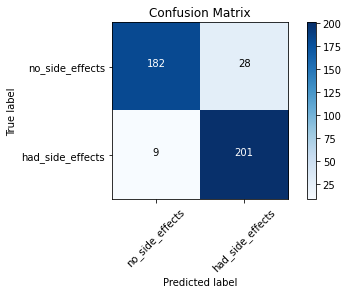

In [34]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')